In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [36]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


# Prepare the dataset

In [37]:
df['Bejaia Region Dataset ']

day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC    ISI  BUI   FWI       Classes  
01   06     2012  29           57   18   0      65.7  3.4  7.6   1.3  3.4   0.5     not fire   
02   06     2012  29           61   13   1.3    64.4  4.1  7.6   1    3.9   0.4     not fire   
03   06     2012  26           82   22   13.1   47.1  2.5  7.1   0.3  2.7   0.1     not fire   
04   06     2012  25           89   13   2.5    28.6  1.3  6.9   0    1.7   0       not fire   
                                                                                       ...     
26   09     2012  30           65   14   0      85.4  16   44.5  4.5  16.9  6.5         fire   
27   09     2012  28           87   15   4.4    41.1  6.5  8     0.1  6.2   0       not fire   
28   09     2012  27           87   29   0.5    45.9  3.5  7.9   0.4  3.4   0.2     not fire   
29   09     2012  24           54   18   0.1    79.7  4.3  15.2  1.7  5.1   0.7     not fire   
30   09     2012  24           64   15  

In [38]:
len(df['Bejaia Region Dataset '])

247

In [39]:
#input columns has spaces so need to remove them
df['Bejaia Region Dataset '].index[0]

('day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI')

In [40]:
cols=[]
for i in df['Bejaia Region Dataset '].index[0]:
    cols.append(i.strip())
cols

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [41]:
df_final=pd.DataFrame(columns=cols)

#input features
for i in range(1,len(df['Bejaia Region Dataset '])):
    df_final.loc[len(df_final.index)]=list(df['Bejaia Region Dataset '].index[i])

#output column
y=[]
for i in range(1,len(df['Bejaia Region Dataset '])):
    y.append(df['Bejaia Region Dataset '][i])

df_final['Classes']=y
df_final

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# Handle Missing Values

In [42]:
df_final.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

<AxesSubplot:>

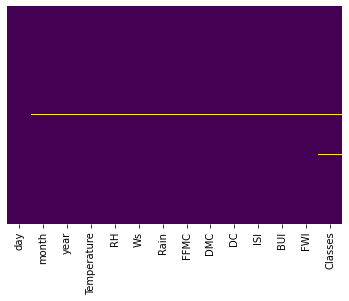

In [43]:
sns.heatmap(df_final.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
#we can drop the missing values (2 rows)

df_final.dropna(inplace=True)
df_final

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [45]:
df_final.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

# EDA and Feature Engineering

In [46]:
df_final.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [47]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [48]:
df_final.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244,244,244,244,244,244,244,244,244,244,244,244,244,244
unique,32,5,2,20,63,19,40,174,166,198,107,174,127,9
top,01,08,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,243,29,10,43,133,7,5,5,8,5,12,131


## Handle Categorical Values

In [49]:
df_final['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [50]:
df_final['month'].unique()

array(['06', '07', '08', '09', 'month'], dtype=object)

In [51]:
df_final['year'].unique()

array(['2012', 'year'], dtype=object)

In [52]:
# we can remove year and day column as it wont affect the predictions 

df_final.drop(['day','year'],axis=1,inplace=True)
df_final

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...
241,09,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,09,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,09,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,09,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [53]:
#one row contains names of columns so it can be removed

df_final[df_final['month']=='month']

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [54]:
df_final.drop(index=123,inplace=True)
df_final

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...
241,09,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,09,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,09,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,09,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [55]:
df_final.reset_index(inplace=True,drop=True)
df_final

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...
238,09,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,09,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
240,09,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,09,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [56]:
df_final['month'].unique()

array(['06', '07', '08', '09'], dtype=object)

In [57]:
df_final['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [58]:
df_final['Classes']=df_final['Classes'].str.strip()
df_final['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

## Convert object type to integer and float

In [59]:
df_final.dtypes

month          object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [60]:
int_col=['month']
float_col=['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']

for i in int_col:
    df_final[i]=df_final[i].astype(str).astype(int)
    
for i in float_col:
    df_final[i]=df_final[i].astype(str).astype(float)

df_final.dtypes

month            int32
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [61]:
for column in df_final:
    print(column, len(df_final[column].unique()))

month 4
Temperature 19
RH 62
Ws 18
Rain 39
FFMC 173
DMC 165
DC 197
ISI 106
BUI 173
FWI 125
Classes 2


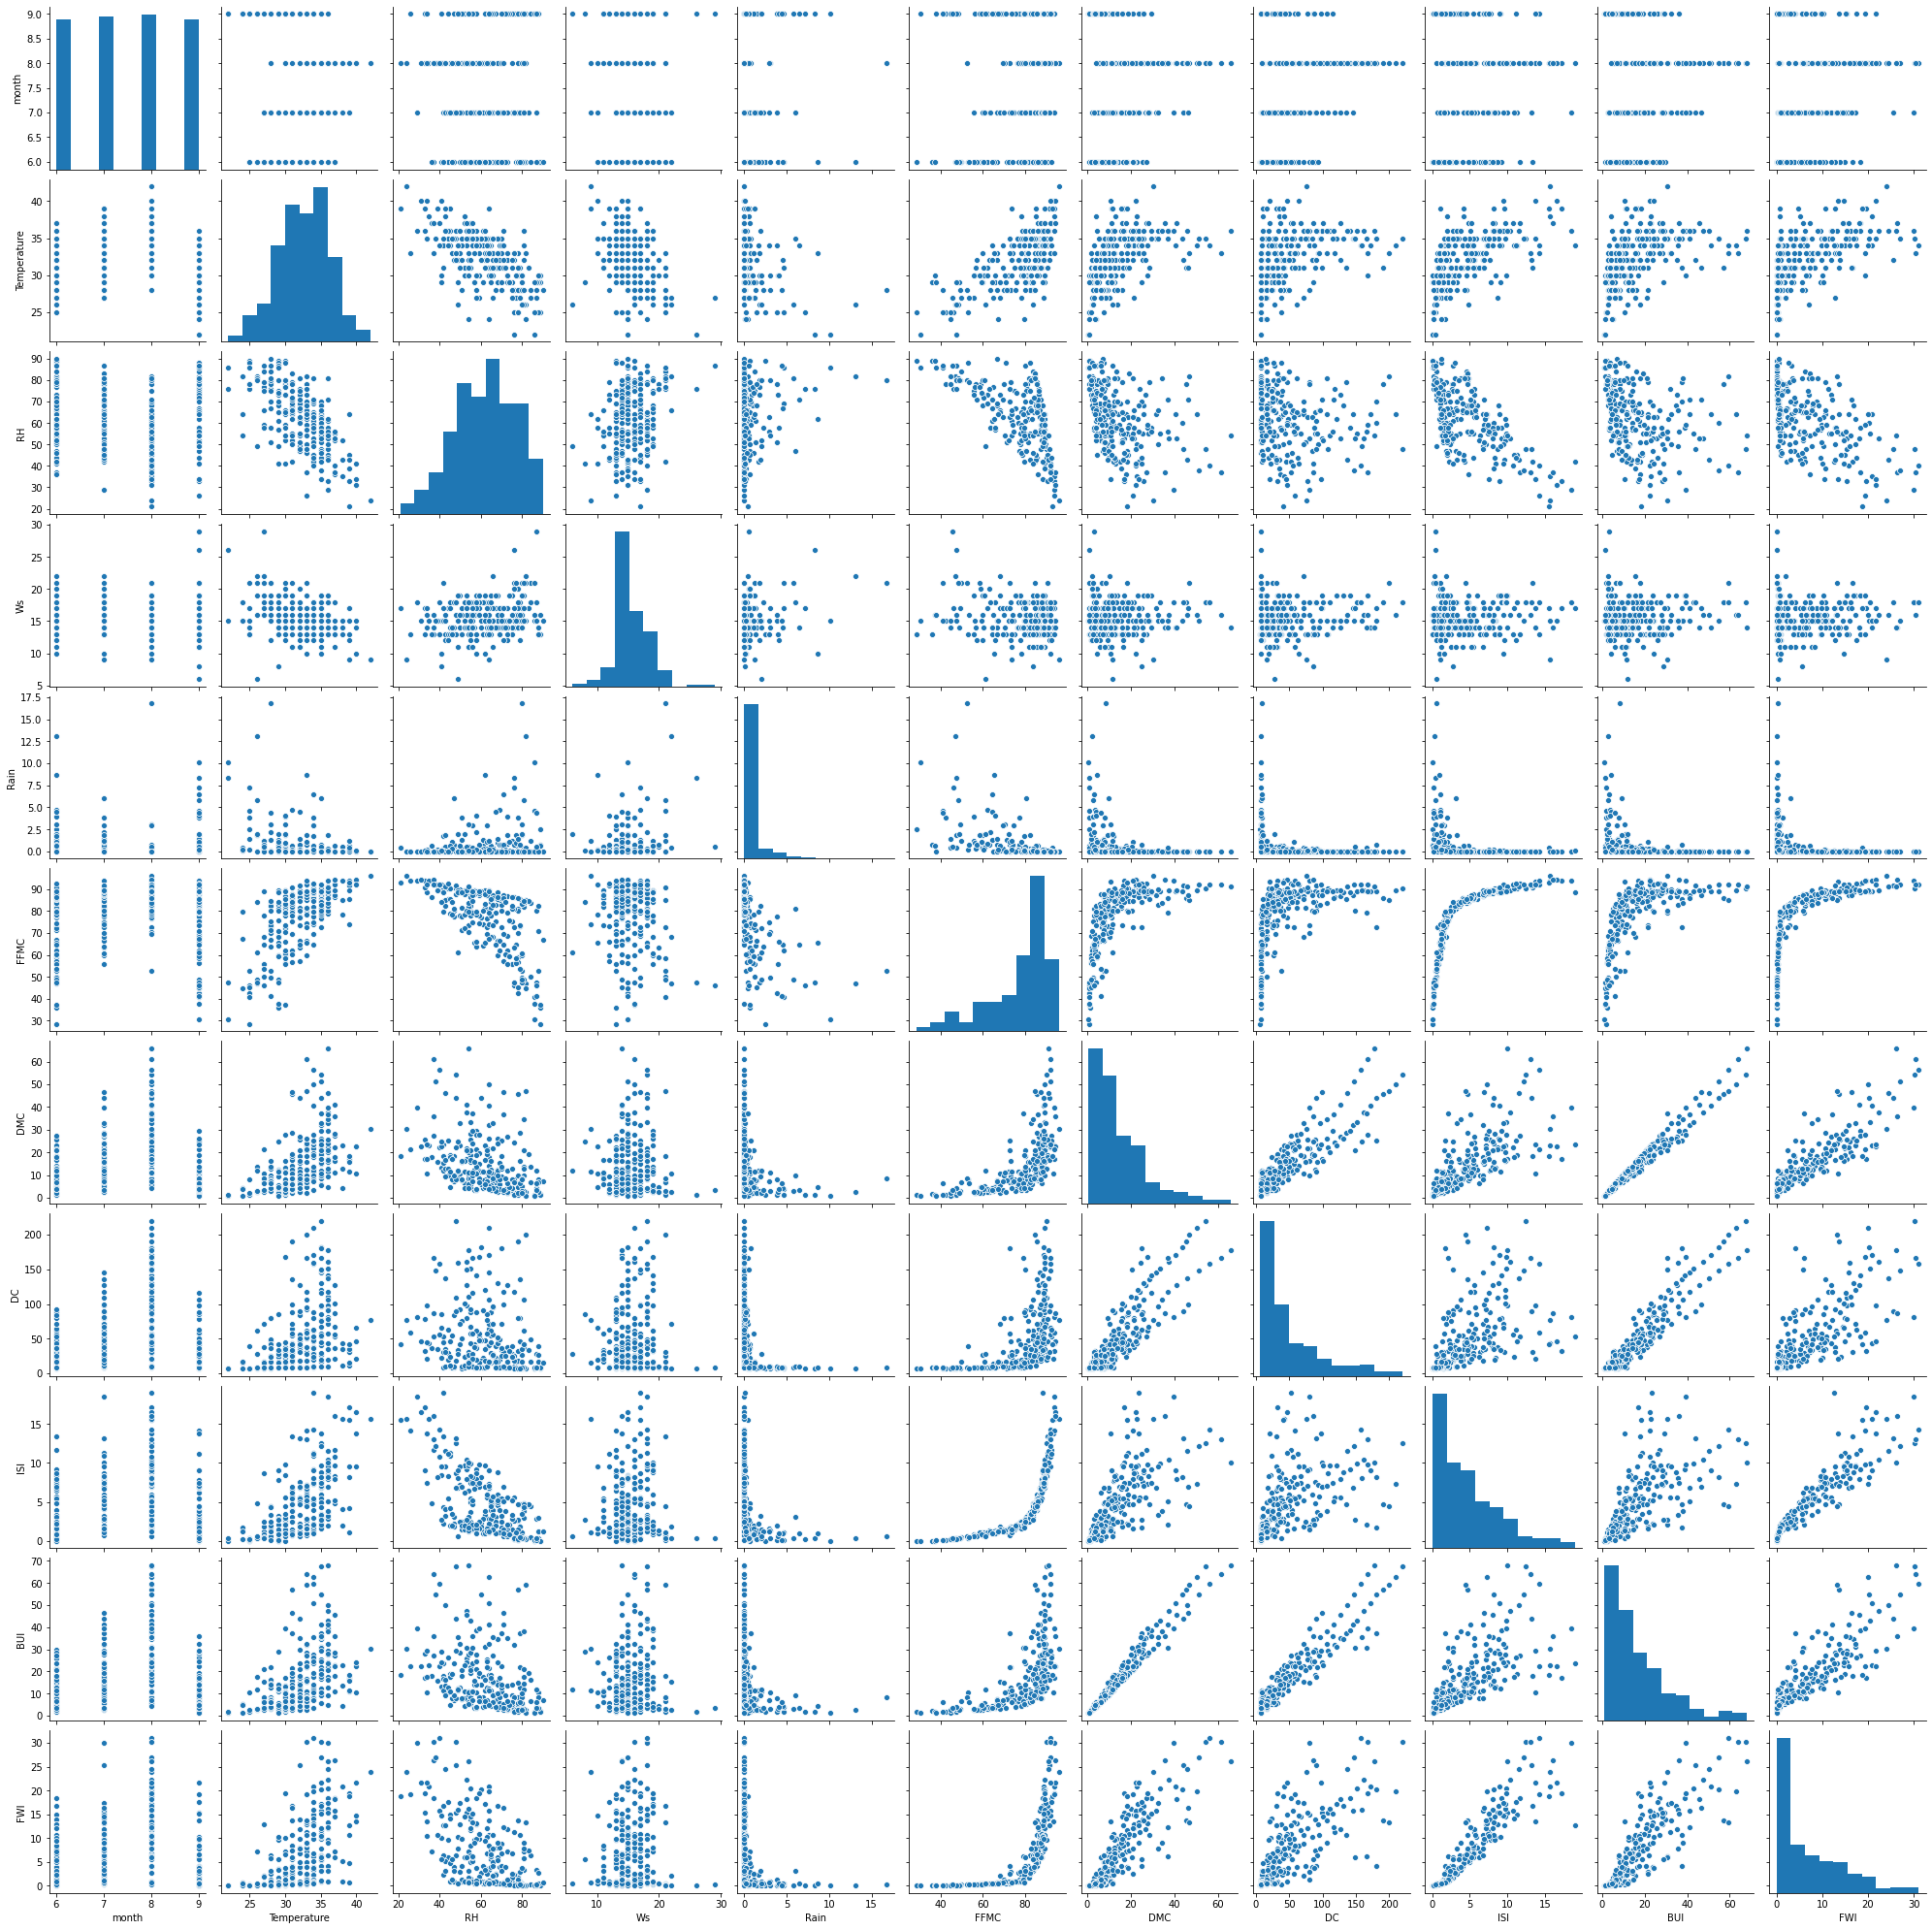

In [62]:
sns.pairplot(data=df_final)

<AxesSubplot:xlabel='Classes', ylabel='count'>

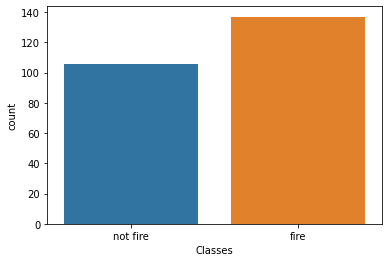

In [63]:
sns.countplot(x=df_final['Classes'])

#no imbalance present

<AxesSubplot:xlabel='Classes', ylabel='count'>

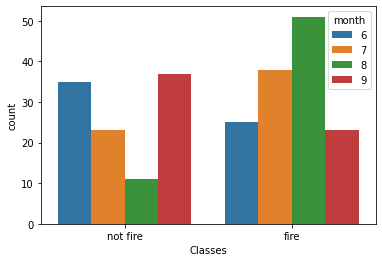

In [64]:
sns.countplot(x=df_final['Classes'],hue=df_final['month'])

#maximum fire occured in month 7 and 8

## Check Correlation

<AxesSubplot:>

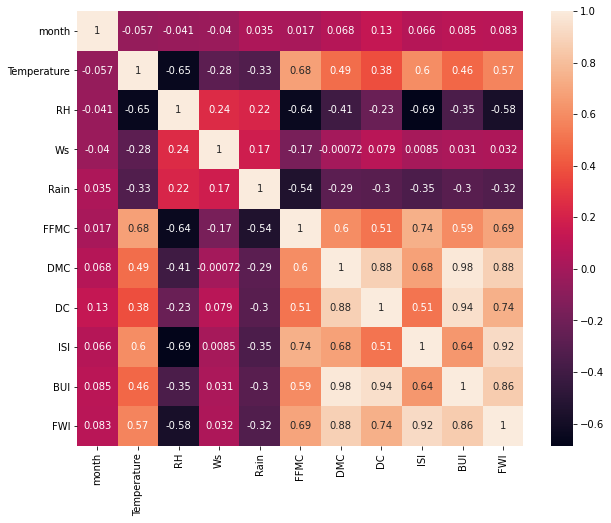

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(df_final.corr(), annot=True)

In [66]:
#we can remove features with high correlation- BUI, FWI

df_final.drop(['BUI','FWI'],inplace=True,axis=1)
df_final

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes
0,6,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,not fire
1,6,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,not fire
2,6,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,not fire
3,6,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,not fire
4,6,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,not fire
...,...,...,...,...,...,...,...,...,...,...
238,9,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,fire
239,9,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,not fire
240,9,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,not fire
241,9,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,not fire


<AxesSubplot:>

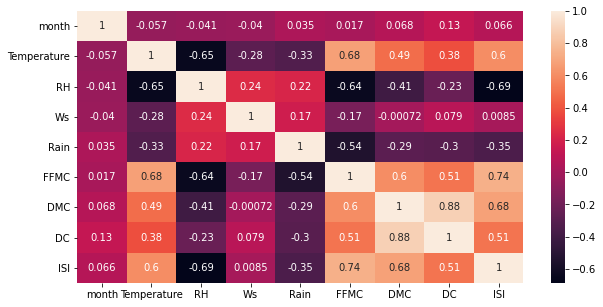

In [67]:
plt.figure(figsize=(10,5))
sns.heatmap(df_final.corr(),annot=True)

In [68]:
#seperate numerical and categorical columns

df_num=df_final.drop(columns=['month','Classes'])
df_cat=df_final[['month','Classes']]

In [69]:
df_num

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2
...,...,...,...,...,...,...,...,...
238,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5
239,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1
240,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4
241,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7


In [70]:
df_cat

,month,Classes
0,6,not fire
1,6,not fire
2,6,not fire
3,6,not fire
4,6,not fire
...,...,...
238,9,fire
239,9,not fire
240,9,not fire
241,9,not fire


## Feature Scaling

In [71]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_num)

In [72]:
df_scaled=pd.DataFrame(data=df_scaled, columns=df_num.columns)
df_scaled

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI
0,-0.870655,-0.340673,0.893277,-0.381657,-0.847927,-0.912120,-0.879401,-0.830356
1,-0.870655,-0.070359,-0.888877,0.268642,-0.938709,-0.855520,-0.879401,-0.902720
2,-1.699254,1.348788,2.319000,6.171355,-2.146802,-0.984891,-0.889913,-1.071571
3,-1.975454,1.821837,-0.888877,0.868918,-3.438694,-1.081920,-0.894117,-1.143935
4,-1.423054,1.010896,0.180416,-0.381657,-0.910776,-0.944463,-0.740651,-0.854477
...,...,...,...,...,...,...,...,...
238,-0.594455,0.199954,-0.532446,-0.381657,0.527763,0.106678,-0.103661,-0.058467
239,-1.146855,1.686680,-0.176015,1.819355,-2.565794,-0.661463,-0.870992,-1.119814
240,-1.423054,1.686680,4.814014,-0.131542,-2.230600,-0.904034,-0.873095,-1.047449
241,-2.251654,-0.543409,0.893277,-0.331634,0.129721,-0.839349,-0.719628,-0.733870


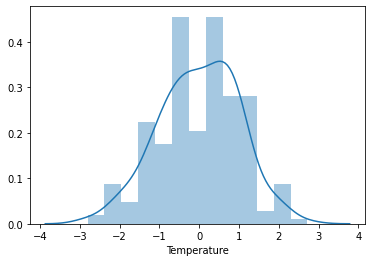

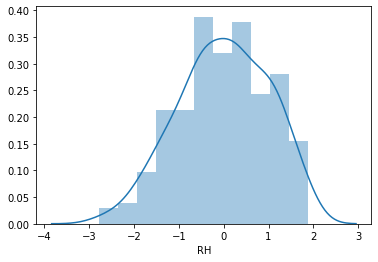

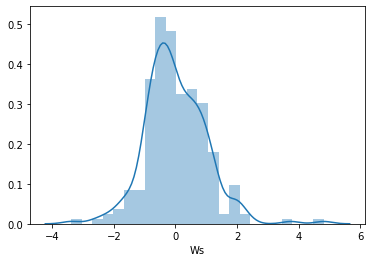

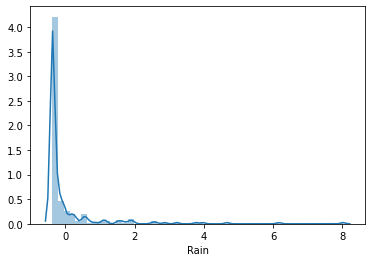

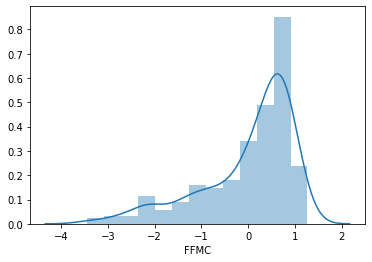

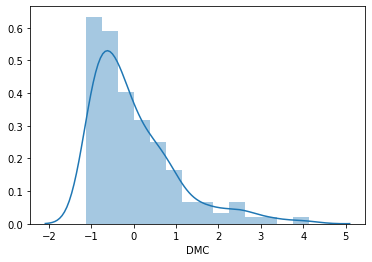

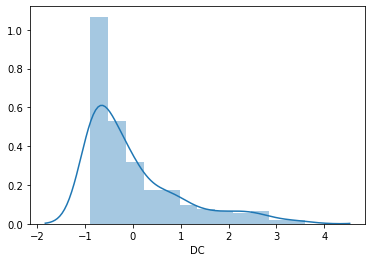

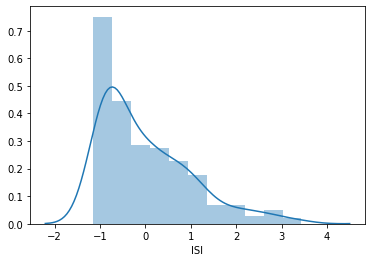

In [73]:
for column in df_scaled:
    sns.distplot(df_scaled[column], kde=True)
    plt.show()

<AxesSubplot:>

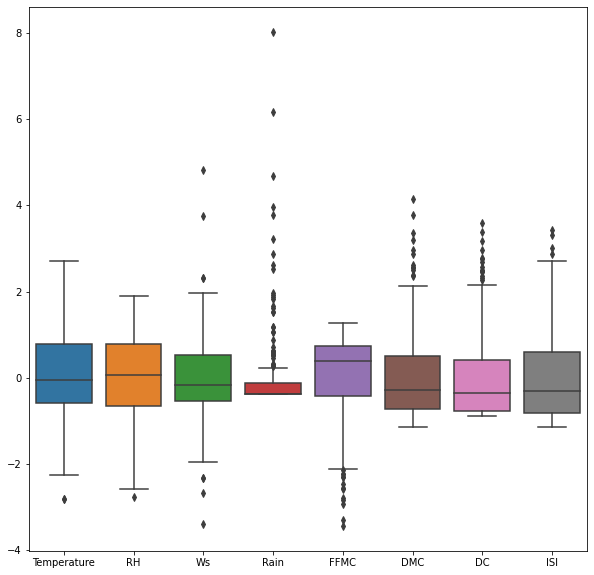

In [74]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_scaled)

#we are not handling outliers as the dataset contains mostly weather data which are on scale

## Encode categorical column - Classes

In [75]:
df_cat

,month,Classes
0,6,not fire
1,6,not fire
2,6,not fire
3,6,not fire
4,6,not fire
...,...,...
238,9,fire
239,9,not fire
240,9,not fire
241,9,not fire


In [76]:
df_cat.dtypes

month       int32
Classes    object
dtype: object

In [77]:
df_cat['Classes']=df_cat['Classes'].map({'not fire':0,'fire':1})
df_cat['Classes']=df_cat['Classes'].astype(str).astype(int)
df_cat

C:\Users\WINDOWS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\WINDOWS\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month,Classes
0,6,0
1,6,0
2,6,0
3,6,0
4,6,0
...,...,...
238,9,1
239,9,0
240,9,0
241,9,0


In [78]:
final_df=pd.concat([df_scaled, df_cat], axis=1)
final_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,month,Classes
0,-0.870655,-0.340673,0.893277,-0.381657,-0.847927,-0.912120,-0.879401,-0.830356,6,0
1,-0.870655,-0.070359,-0.888877,0.268642,-0.938709,-0.855520,-0.879401,-0.902720,6,0
2,-1.699254,1.348788,2.319000,6.171355,-2.146802,-0.984891,-0.889913,-1.071571,6,0
3,-1.975454,1.821837,-0.888877,0.868918,-3.438694,-1.081920,-0.894117,-1.143935,6,0
4,-1.423054,1.010896,0.180416,-0.381657,-0.910776,-0.944463,-0.740651,-0.854477,6,0
...,...,...,...,...,...,...,...,...,...,...
238,-0.594455,0.199954,-0.532446,-0.381657,0.527763,0.106678,-0.103661,-0.058467,9,1
239,-1.146855,1.686680,-0.176015,1.819355,-2.565794,-0.661463,-0.870992,-1.119814,9,0
240,-1.423054,1.686680,4.814014,-0.131542,-2.230600,-0.904034,-0.873095,-1.047449,9,0
241,-2.251654,-0.543409,0.893277,-0.331634,0.129721,-0.839349,-0.719628,-0.733870,9,0


# Regression for Temperature

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [80]:
x=final_df.drop(columns=['Temperature'])
y=final_df['Temperature']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (194, 9)
x test:  (49, 9)
y train:  (194,)
y test:  (49,)


## Linear Regression

In [81]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test, y_pred)

print('MSE: ', mse)
print('r2_score: ', r2)

MSE:  0.4282024409125421
r2_score:  0.5217517260916541


## Ridge Regression

In [102]:
param_grid_ridge={
    "alpha" : np.arange(0, 10, 0.1)
}

grid_search_ridge=GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_search_ridge.fit(x_train, y_train)
grid_search_ridge.best_params_

{'alpha': 9.9}

In [103]:
ridge=Ridge(alpha=9.9)
ridge.fit(x_train, y_train)

Ridge(alpha=9.9)

In [104]:
y_pred=ridge.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test, y_pred)

print('MSE: ', mse)
print('r2_score: ', r2)

MSE:  0.42047209040030653
r2_score:  0.5303855554115067


## Lasso Regression

In [106]:
param_grid_lasso={
    "alpha" : np.arange(0, 10, 0.1)
}

grid_search_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_search_lasso.fit(x_train, y_train)
grid_search_lasso.best_params_

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.88517935871929, tolerance: 0.01621227900189387
  positive)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\U

{'alpha': 0.0}

In [107]:
lasso=Lasso(alpha=0.0)
lasso.fit(x_train,y_train)

C:\Users\WINDOWS\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.28394410465657, tolerance: 0.01979532760318322
  positive)


Lasso(alpha=0.0)

In [108]:
y_pred=lasso.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test, y_pred)

print('MSE: ', mse)
print('r2_score: ', r2)

MSE:  0.4282024409125418
r2_score:  0.5217517260916544


## SVR 

In [89]:
param_grid_svr={
    "kernel" : ["rbf","linear"],
    "gamma" : ["scale", "auto"],
    "C":[2.0, 1.5, 1.0, 0.5, 0.1, 0.05, 0.01],
    "epsilon" : np.arange(0.1,5,0.1)   
}

grid_search_svr1=GridSearchCV(SVR(), param_grid_svr, cv=5)
grid_search_svr1.fit(x_train, y_train)
grid_search_svr1.best_params_

{'C': 2.0, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

In [90]:
svr1=SVR(C=2.0, kernel="rbf", epsilon=0.1, gamma='auto')
svr1.fit(x_train, y_train)

SVR(C=2.0, gamma='auto')

In [91]:
y_pred=svr1.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test, y_pred)

print('MSE: ', mse)
print('r2_score: ', r2)

MSE:  0.3145663884881056
r2_score:  0.6486689052883159


## Decission Tree Regressor

In [93]:
param_grid_dt={
    "criterion" : ["mse", "friedman_mse"],
    "min_samples_leaf" : [1,3, 5, 8, 10],
    "max_features" : ["sqrt", "log2", None],
    "random_state" : [10, 30, 50, 100]
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5)
grid_search_dt.fit(x_train, y_train)
grid_search_dt.best_params_

{'criterion': 'friedman_mse',
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'random_state': 10}

In [94]:
dtr=DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=5,  max_features='sqrt', random_state=10)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_samples_leaf=5, random_state=10)

In [95]:
y_pred=dtr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test, y_pred)

print('MSE: ', mse)
print('r2_score: ', r2)

MSE:  0.46325241495589664
r2_score:  0.4826053131215554


## Random Forrest Regression

In [ ]:
rfr=RandomForestRegressor()

In [99]:
param_grid_rf={
    "criterion" : ["mse", "mae"],
    "min_samples_leaf" : [1,2,5,10],
    "max_features" : ["sqrt", "log2", "auto"],
    "random_state" : [10, 30, 50, 100]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_search_rf.fit(x_train, y_train)
grid_search_rf.best_params_

{'criterion': 'mse',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'random_state': 50}

In [100]:
rfr=RandomForestRegressor(criterion='mse',max_features='sqrt',min_samples_leaf=1,random_state=50)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', random_state=50)

In [101]:
y_pred=rfr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test, y_pred)

print('MSE: ', mse)
print('r2_score: ', r2)

MSE:  0.32014100720056093
r2_score:  0.6424427572746629


In [109]:
#Observation : best result is given by SVR so we will select that model

file = "regression_model.pickle"
pickle.dump(svr1, open(file, 'wb'))

# Classification for Classes (Fire/Not Fire)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score

In [111]:
x=final_df.drop(columns=['Classes'])
y=final_df['Classes']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (194, 9)
x test:  (49, 9)
y train:  (194,)
y test:  (49,)


## Logistic Regression

In [112]:
param_grid={
    "penalty":["l1", "l2","elasticnet"],
    "solver" :["liblinear", "saga","lbfgs"],
    "C":[2.0, 1.5, 1.0, 0.5, 0.1, 0.05, 0.01],
    "random_state" : [50, 100, 150, 200, 300]}

grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 451, in _check_solver
    " got solver={}.".format(solver))
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on thi

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score o

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score o

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score o

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 59

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1315, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_valida

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

{'C': 0.1, 'penalty': 'l1', 'random_state': 50, 'solver': 'saga'}

In [113]:
lr=LogisticRegression(penalty='l1',C=0.1,solver='saga',random_state=50)
lr.fit(x_train,y_train)

C:\Users\WINDOWS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.1, penalty='l1', random_state=50, solver='saga')

In [114]:
y_pred=lr.predict(x_test)
print('Confusion Matrix : ',confusion_matrix(y_test,y_pred))
print('Accuracy Score : ',roc_auc_score(y_test,y_pred))

Confusion Matrix :  [[18  0]
 [ 2 29]]
Accuracy Score :  0.967741935483871


## Naive Bayes

In [115]:
param_grid={"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}

grid_search=GridSearchCV(GaussianNB(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'var_smoothing': 1e-09}

In [116]:
nb=GaussianNB(var_smoothing=1e-09)
nb.fit(x_train,y_train)

GaussianNB()

In [117]:
y_pred=nb.predict(x_test)
print('Confusion Matrix : ',confusion_matrix(y_test,y_pred))
print('Accuracy Score : ',roc_auc_score(y_test,y_pred))

Confusion Matrix :  [[17  1]
 [ 2 29]]
Accuracy Score :  0.9399641577060931


## Decision Tree

In [118]:
param_grid={"criterion" : ["gini", "entropy"],
    "max_features" : ["sqrt", "log2", "auto"],
    "random_state" : [10, 50, 100, 150, 200]
}

grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'random_state': 100}

In [119]:
dtc=DecisionTreeClassifier(criterion='gini',max_features='sqrt',random_state=100)
dtc.fit(x_test,y_test)

DecisionTreeClassifier(max_features='sqrt', random_state=100)

In [120]:
y_pred=dtc.predict(x_test)
print('Confusion Matrix : ',confusion_matrix(y_test,y_pred))
print('Accuracy Score : ',roc_auc_score(y_test,y_pred))

Confusion Matrix :  [[18  0]
 [ 0 31]]
Accuracy Score :  1.0


## Random Forrest

In [121]:
param_grid={"n_estimators" : [50,100,150,200],
    "criterion" : ["gini", "entropy"],
    "max_features" : ["sqrt", "log2", "auto"],
    "random_state" : [10, 50, 120, 150]}

grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 50,
 'random_state': 10}

In [122]:
rfc=RandomForestClassifier(criterion='gini',max_features='sqrt',n_estimators=50,random_state=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=10)

In [123]:
y_pred=rfc.predict(x_test)
print('Confusion Matrix : ',confusion_matrix(y_test,y_pred))
print('Accuracy Score : ',roc_auc_score(y_test,y_pred))

Confusion Matrix :  [[18  0]
 [ 2 29]]
Accuracy Score :  0.967741935483871


In [124]:
#we can choose random forrest as best model based on accuracy

file = "classification_model.pickle"
pickle.dump(rfc, open(file, 'wb'))